3. Predicting Titanic Survival Using Logistic Regression
   Dataset: 
Titanic Dataset
   Preprocessing Steps:
Handle missing values (e.g., fill missing ages with median).
Encode categorical variables (e.g., one-hot encoding for embarked and gender).
Standardize numerical features.
   Task:
Implement logistic regression to predict survival on the Titanic and evaluate the model using ROC-AUC.


In [48]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [34]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [36]:
df.drop('Cabin',axis=1,inplace=True)

In [37]:
df['Age'].fillna(df['Age'].median(), inplace=True)

C:\Users\khali\AppData\Local\Temp\ipykernel_28488\1933487976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [38]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\khali\AppData\Local\Temp\ipykernel_28488\3744086084.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [39]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [40]:
categorical_features=['Embarked','Sex']
numeric_features = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']

In [42]:
preprocessor=ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),numeric_features),
        ('cat',OneHotEncoder(),categorical_features)
    ]
)

In [44]:
pipeline=Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [50]:
import matplotlib.pyplot as plt

In [52]:
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Fare', 'Pclass',
                                                   'SibSp', 'Parch']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Embarked', 'Sex'])])),
                ('classifier', LogisticRegression())])

In [54]:
pipeline.predict_proba(X_test)[:, 1]

array([0.10836997, 0.2193301 , 0.13100756, 0.88918299, 0.74614223,
       0.93416531, 0.68802391, 0.0881589 , 0.7606463 , 0.92449251,
       0.33339458, 0.0677085 , 0.39113971, 0.14477688, 0.19533309,
       0.93961123, 0.30018484, 0.68806521, 0.24200372, 0.33076284,
       0.11774845, 0.40835143, 0.62143439, 0.13136748, 0.10720054,
       0.06551164, 0.46790591, 0.22037168, 0.07762182, 0.60481282,
       0.1345043 , 0.66803326, 0.56069978, 0.62624773, 0.13813257,
       0.12319422, 0.45850079, 0.68802391, 0.94461921, 0.1056748 ,
       0.19740469, 0.07845984, 0.1057102 , 0.13449353, 0.57956082,
       0.0870127 , 0.13457855, 0.12129178, 0.11753518, 0.33144931,
       0.72310353, 0.81530303, 0.03866046, 0.50706724, 0.04796044,
       0.93493504, 0.21416189, 0.9332155 , 0.78361365, 0.74368448,
       0.12753988, 0.86253675, 0.77151001, 0.45273199, 0.13449353,
       0.64372645, 0.30744327, 0.10282729, 0.14281685, 0.87935621,
       0.76156697, 0.94981292, 0.57522473, 0.90700038, 0.12093

In [55]:
roc_auc_score(y_test, y_pred_prob)

0.8822393822393821

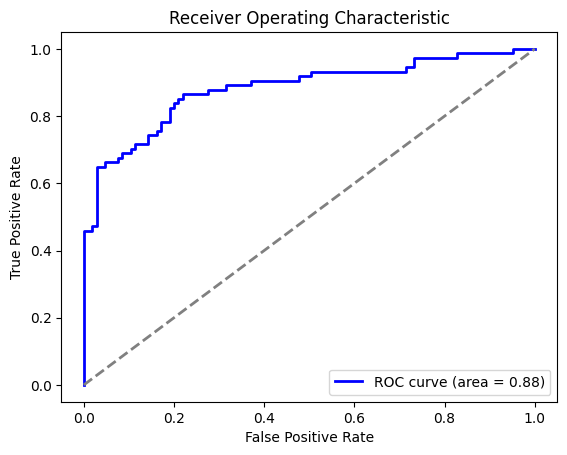

In [56]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [58]:
accuracy_score(y_test,y_pred=pipeline.predict(X_test))

0.8100558659217877